# BIG MART SALES ANALYSIS:

In [135]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [137]:
df = pd.read_csv("bigmart train.csv")

In [208]:
df.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [141]:
df.shape

(8523, 12)

In [143]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [147]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


# separate categorical and numerical features


In [150]:
cat_col=[ col for col in df.columns if df[col].dtype=='O']
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [152]:
categorical=df[cat_col]
categorical.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [154]:
categorical.drop('Item_Identifier',axis=1,inplace=True)
categorical.drop('Outlet_Identifier',axis=1,inplace=True)

In [156]:
categorical.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


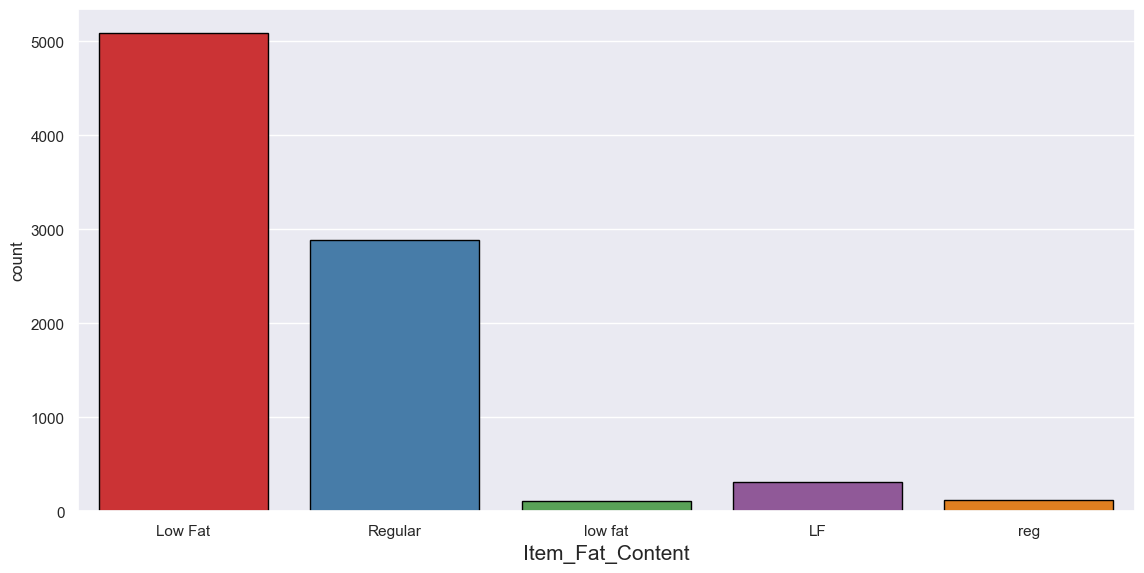

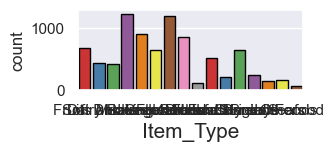

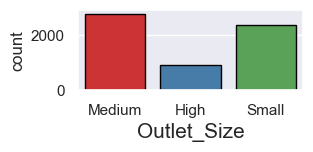

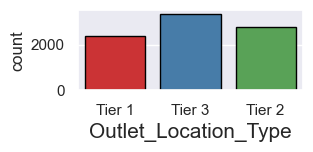

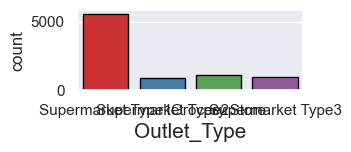

In [158]:
plt.figure(figsize=(30,30))
plotnumber =1 
for column in categorical:
    if plotnumber <=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(x=categorical[column],data=categorical,palette='Set1',edgecolor='black')
        plt.xlabel(column,fontsize=15)
        plotnumber+=1
        plt.show()

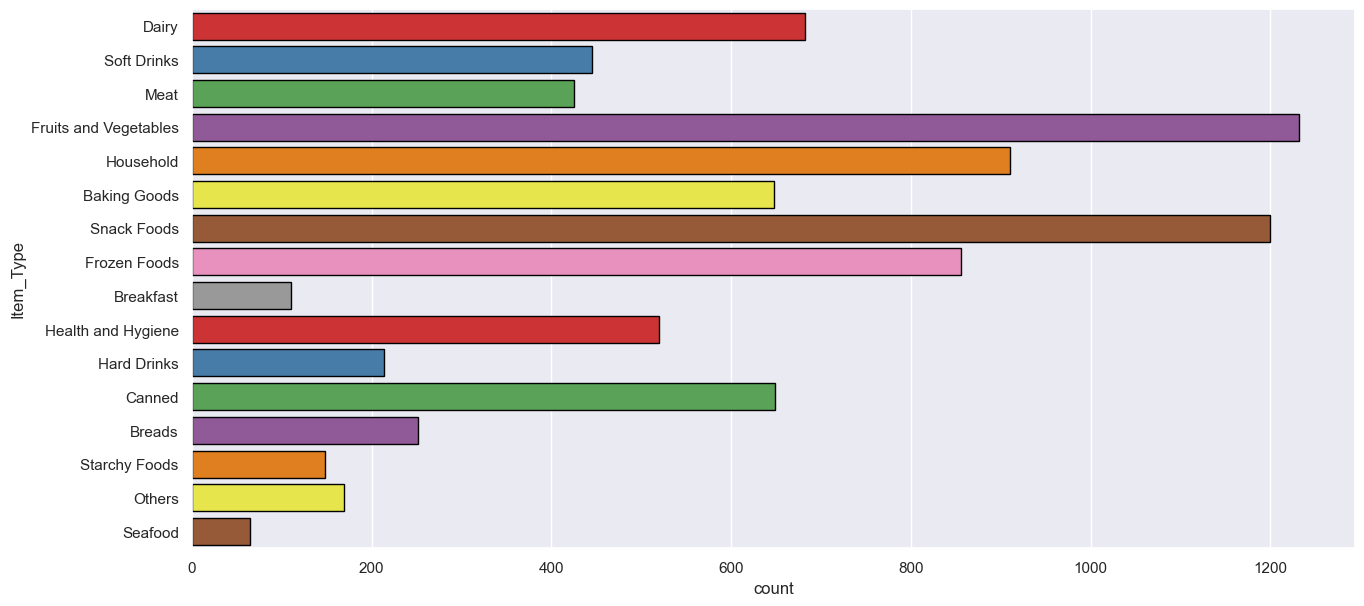

In [159]:
plt.figure(figsize=(15,7))
sns.countplot(y=categorical['Item_Type'], palette='Set1',edgecolor='black')
plt.show()

In [160]:
categorical.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [161]:
categorical.isnull().sum()

Item_Fat_Content           0
Item_Type                  0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [163]:
categorical['Outlet_Size']=categorical['Outlet_Size'].fillna(categorical['Outlet_Size'].mode()[0])
categorical.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [168]:
categorical.isnull().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

# Label encoding 

In [171]:
categorical.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [173]:
col=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [175]:
encoder=LabelEncoder()

In [177]:
def Label_Encoder(col):
    categorical[col]=encoder.fit_transform(categorical[col])

In [179]:
for i in ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']:
 Label_Encoder(i)

In [181]:
categorical.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,4,1,0,1
1,2,14,1,2,2
2,1,10,1,0,1
3,2,6,1,2,0
4,1,9,0,2,1


# numerical data

In [183]:
Num_col=[col for col in df.columns if df[col].dtype!='O']
Num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [185]:
df[Num_col].isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [187]:
Numerical=df[Num_col]
Numerical.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [198]:
Numerical.shape

(8523, 5)

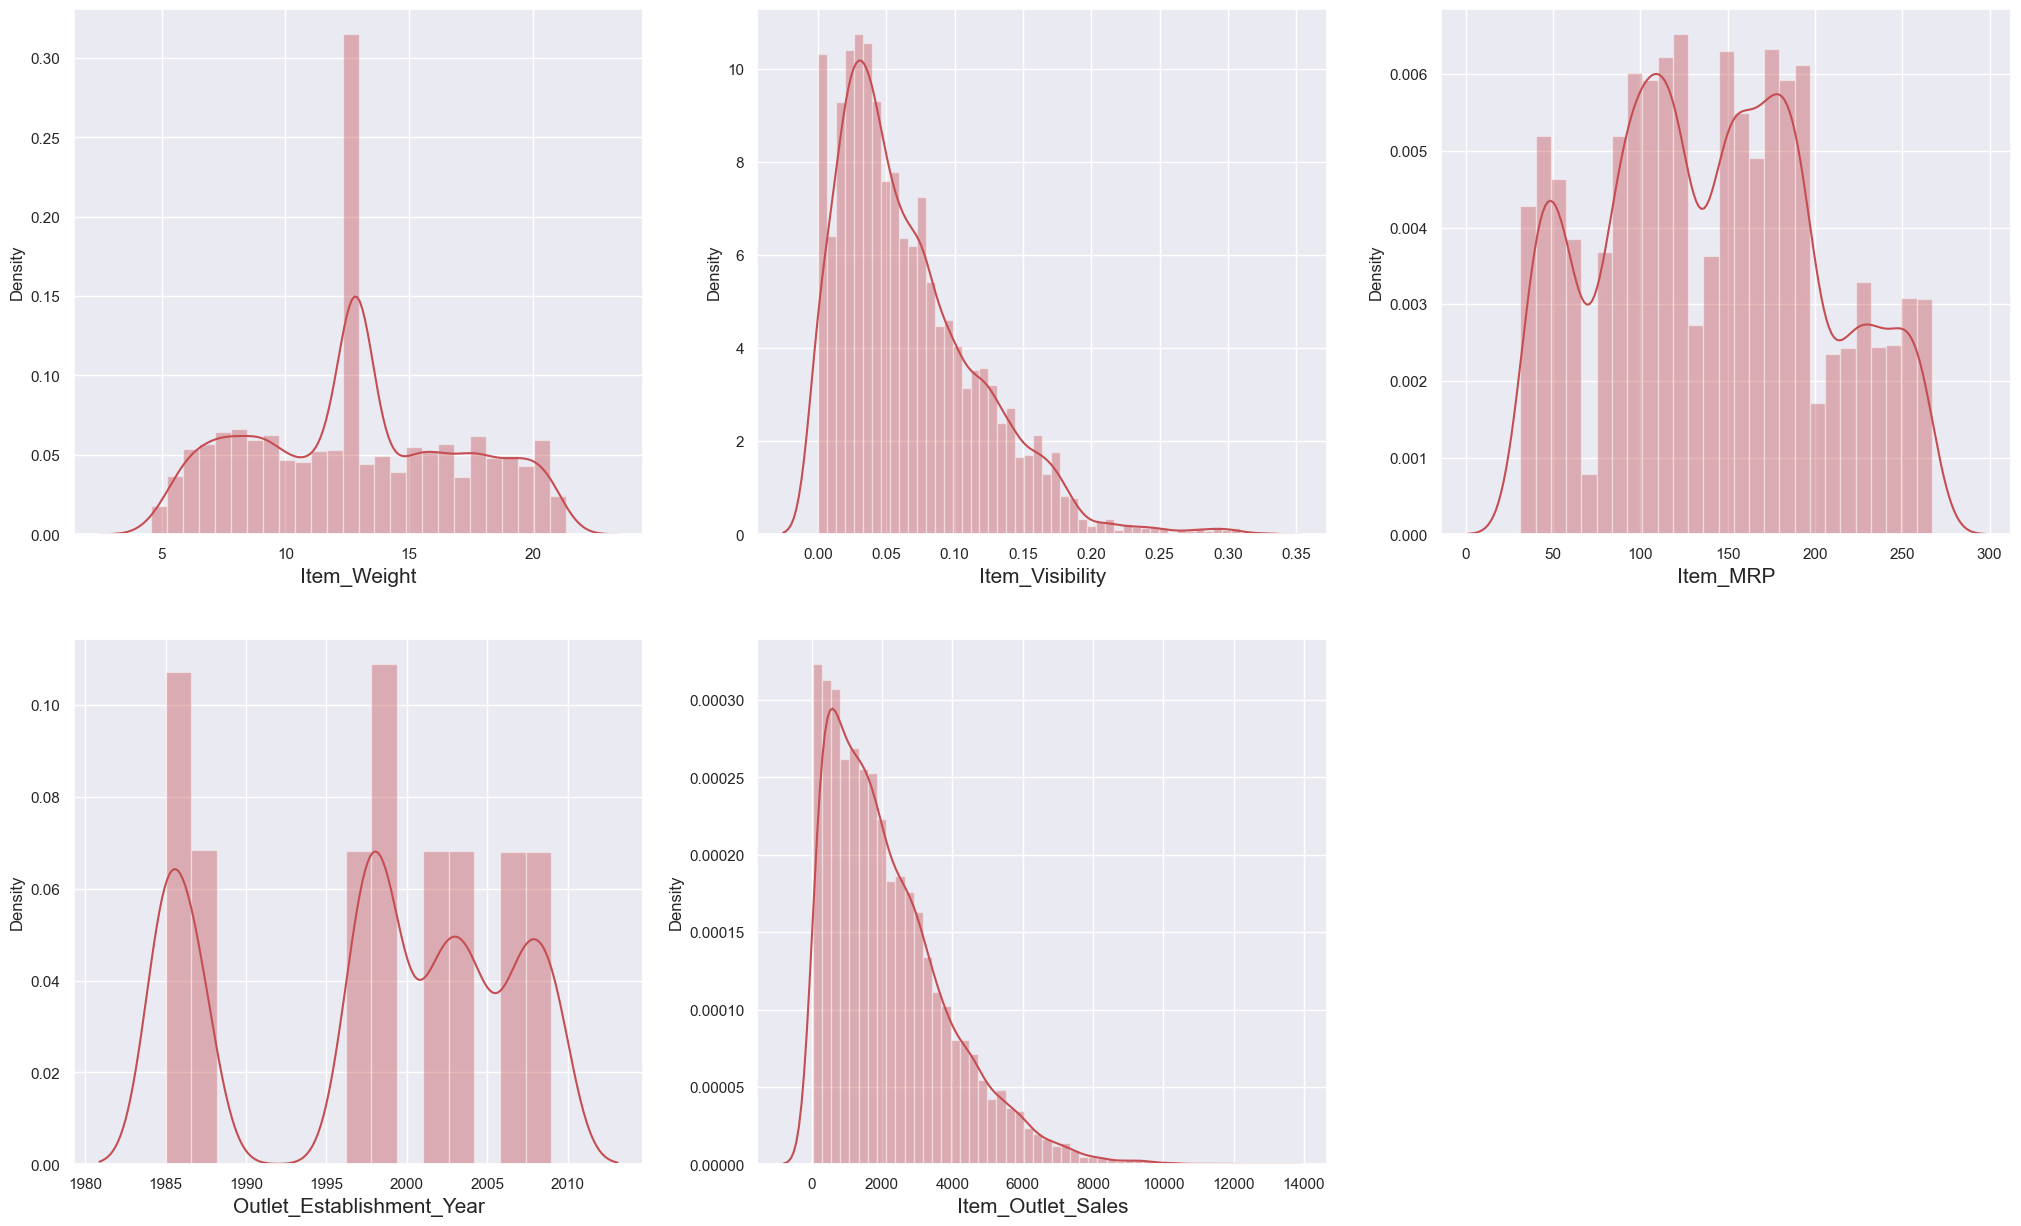

In [248]:
plt.figure(figsize=(25,15))
plotnumber=1
for column in Numerical:
  if plotnumber<=7:
    ax=plt.subplot(2,3,plotnumber)
    sns.distplot(Numerical[column],color='r')
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# impute missing using mode method

In [216]:
Numerical['Item_Weight']=Numerical['Item_Weight'].fillna(Numerical['Item_Weight'].mode()[0])
Numerical.head(50)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300000,0.016047,249.8092,1999,3735.1380
1,5.920000,0.019278,48.2692,2009,443.4228
2,17.500000,0.016760,141.6180,1999,2097.2700
3,19.200000,0.000000,182.0950,1998,732.3800
4,8.930000,0.000000,53.8614,1987,994.7052
5,10.395000,0.000000,51.4008,2009,556.6088
6,13.650000,0.012741,57.6588,1987,343.5528
7,12.857645,0.127470,107.7622,1985,4022.7636
8,16.200000,0.016687,96.9726,2002,1076.5986
9,19.200000,0.094450,187.8214,2007,4710.5350


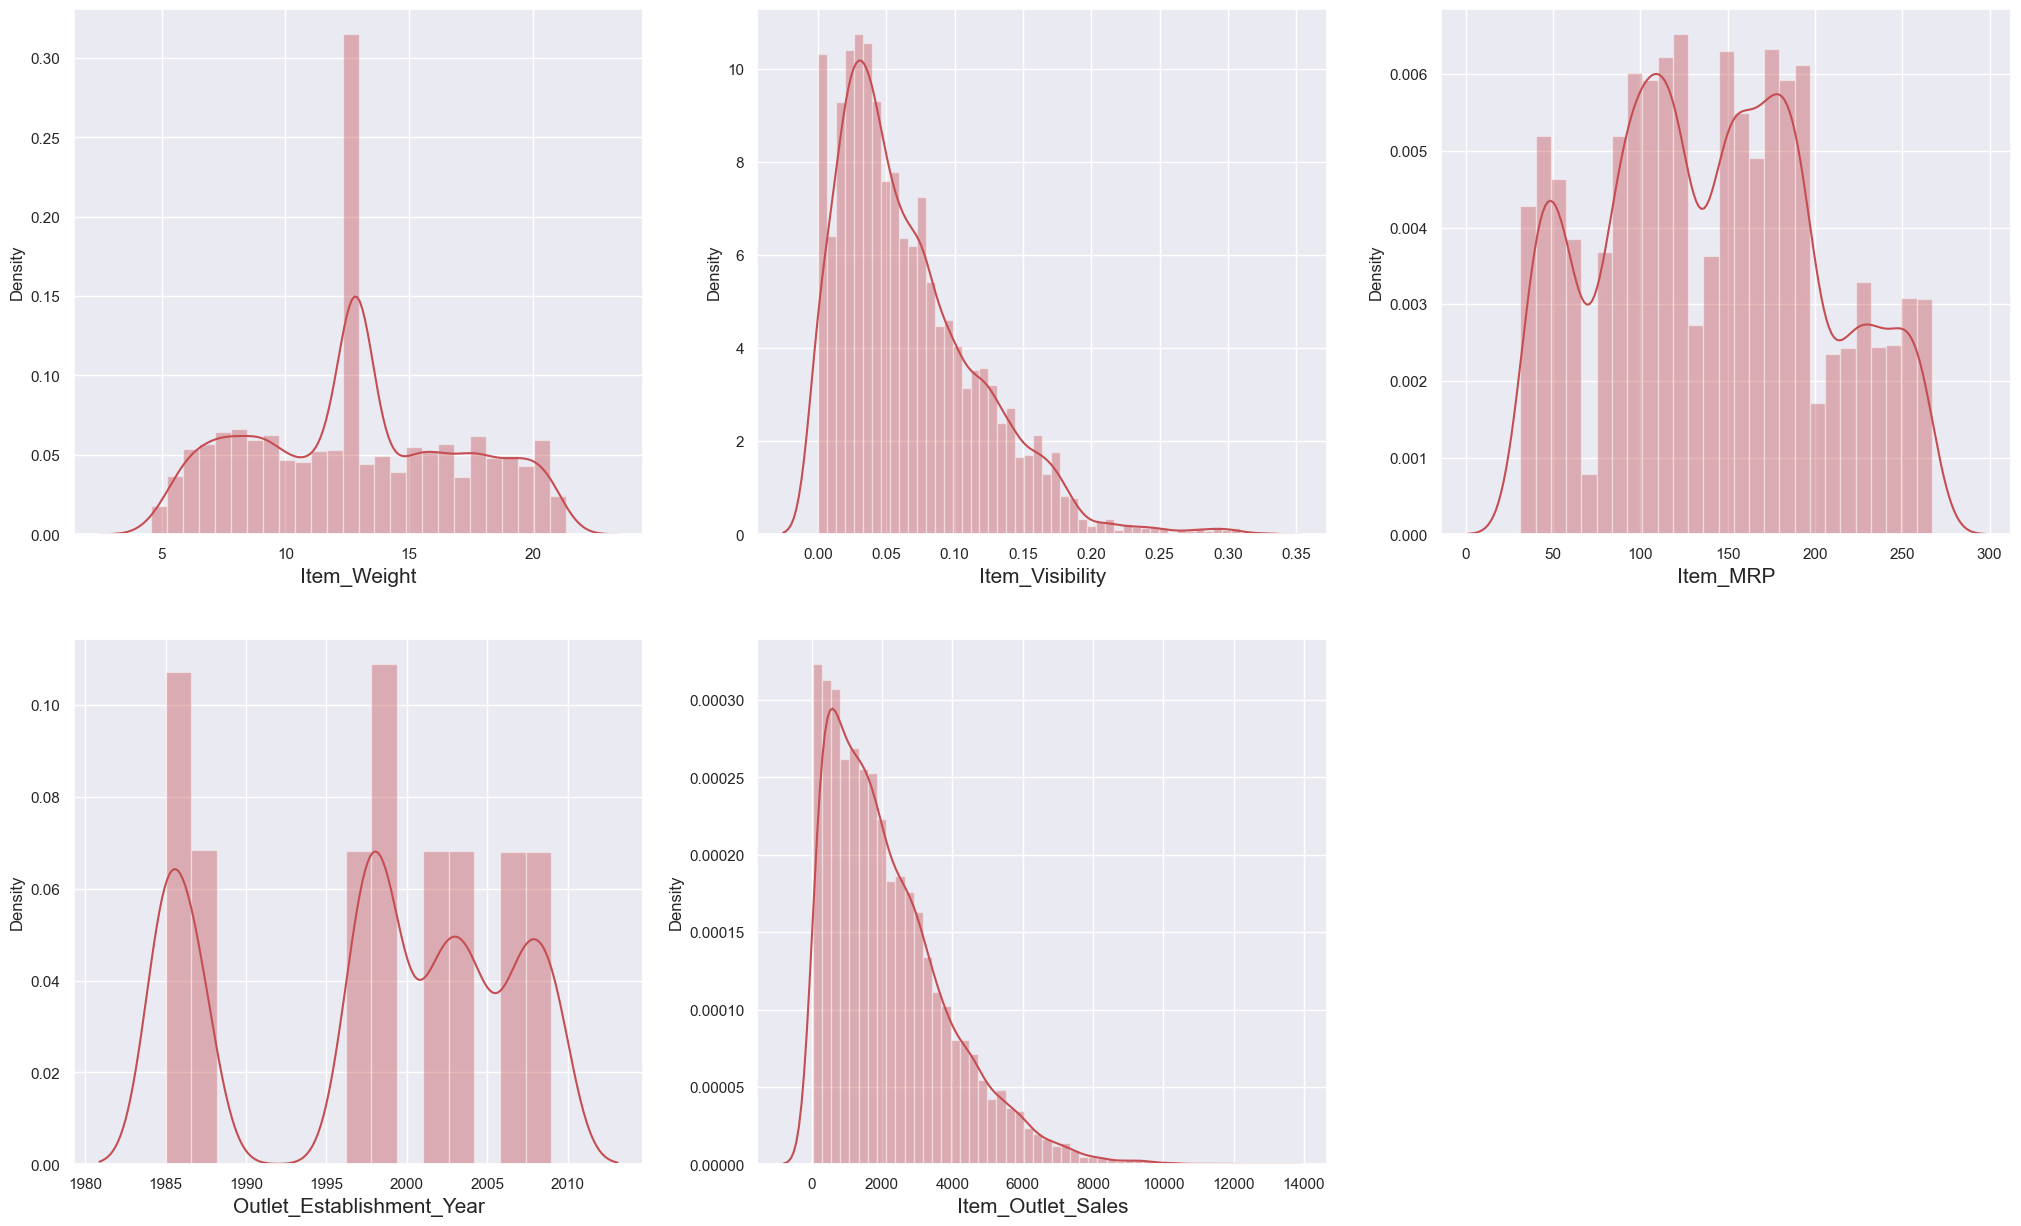

In [252]:
plt.figure(figsize=(25,15))
plotnumber=1
for column in Numerical:
  if plotnumber<=7:
    ax=plt.subplot(2,3,plotnumber)
    sns.distplot(Numerical[column],color='r')
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()



# Concatenate Categorical and numerical data

In [221]:
data=pd.concat([categorical,Numerical],axis=1)
data.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1,4,1,0,1,9.30,0.016047,249.8092,1999,3735.1380
1,2,14,1,2,2,5.92,0.019278,48.2692,2009,443.4228
2,1,10,1,0,1,17.50,0.016760,141.6180,1999,2097.2700
3,2,6,1,2,0,19.20,0.000000,182.0950,1998,732.3800
4,1,9,0,2,1,8.93,0.000000,53.8614,1987,994.7052


In [223]:
data.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

# Constructing the Heat map to understand the correlation

Text(0.5, 1.0, 'Heat map')

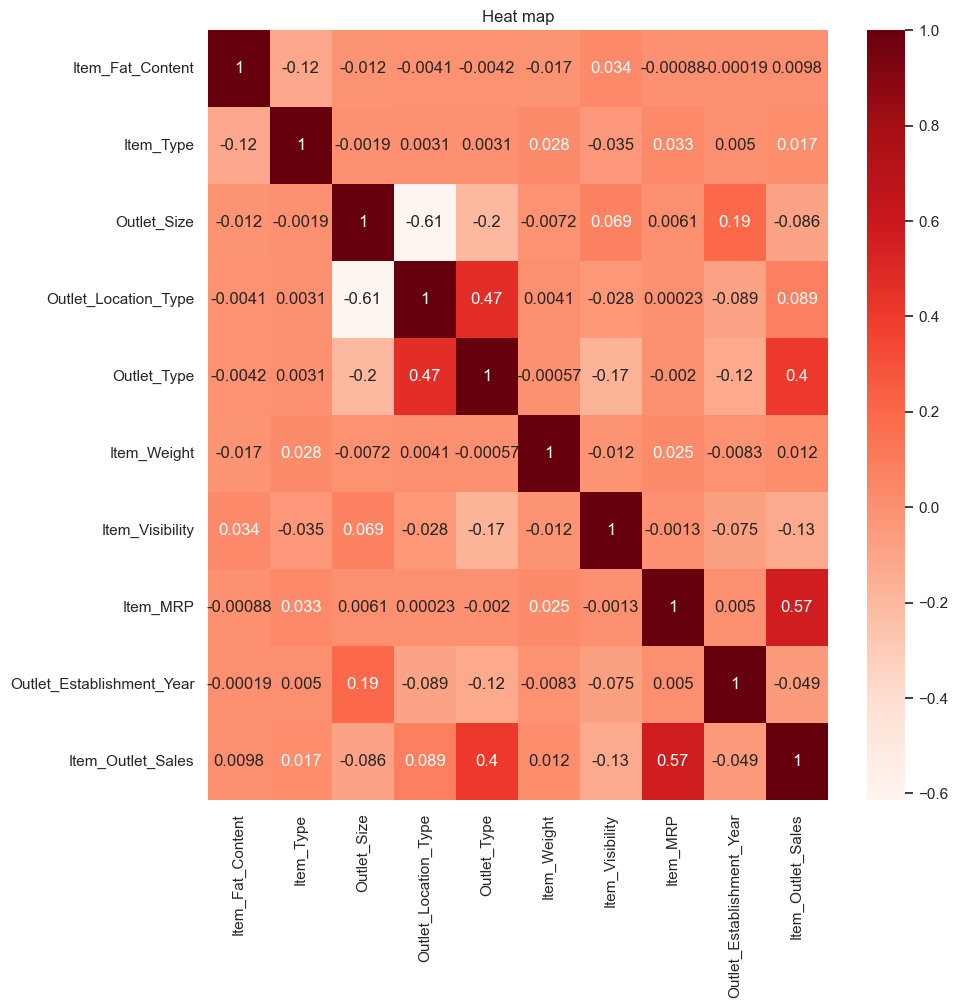

In [246]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='Reds',annot=True,linecolor='black')
plt.title('Heat map')

In [254]:
X = data.drop(columns = ["Item_Outlet_Sales"],axis=1)
Y = data["Item_Outlet_Sales"]
     

In [256]:
X.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,4,1,0,1,9.30,0.016047,249.8092,1999
1,2,14,1,2,2,5.92,0.019278,48.2692,2009
2,1,10,1,0,1,17.50,0.016760,141.6180,1999
3,2,6,1,2,0,19.20,0.000000,182.0950,1998
4,1,9,0,2,1,8.93,0.000000,53.8614,1987


In [258]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [260]:
X.shape

(8523, 9)

In [262]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [264]:
X_scaled

array([[-0.57284357, -0.76647929, -0.28458121, ..., -0.97073217,
         1.74745381,  0.13954076],
       [ 0.97809218,  1.6089627 , -0.28458121, ..., -0.90811123,
        -1.48902325,  1.33410274],
       [-0.57284357,  0.6587859 , -0.28458121, ..., -0.95691733,
         0.01004021,  0.13954076],
       ...,
       [-0.57284357,  0.1836975 ,  1.38127431, ..., -0.59978449,
        -0.89720755,  0.73682175],
       [ 0.97809218,  1.3714185 , -0.28458121, ...,  1.53287976,
        -0.60797692,  1.33410274],
       [-0.57284357,  1.6089627 ,  1.38127431, ..., -0.41193591,
        -1.05226104, -0.09937163]])

In [266]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = X.columns

In [268]:
vif.head()

,VIF,Features
0,1.015290,Item_Fat_Content
1,1.016391,Item_Type
2,1.713702,Outlet_Size
3,2.043009,Outlet_Location_Type
4,1.373824,Outlet_Type


## Here, we have the correlation values for all the features.
## VIF = 1: No correlation (ideal case).
## VIF > 5: High multicollinearity, consider addressing it.
## VIF > 10: Severe multicollinearity, must be addressed.

 ## Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

# Split the dataset into training and testing data :

In [273]:
X_train,X_test,Y_train,Y_test= train_test_split(X_scaled,Y,test_size=0.2,random_state = 10)

In [275]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of Y Train: ",Y_train.shape)
print("Shape of Y Test: ",Y_test.shape)

Shape of X Train:  (6818, 9)
Shape of X Test:  (1705, 9)
Shape of Y Train:  (6818,)
Shape of Y Test:  (1705,)


In [287]:
def predict(ml_model):
    model=ml_model.fit(X_train,Y_train)
    print('Score:{}'.format(model.score(X_train,Y_train)))
    Y_prediction=model.predict(X_test)
    print('predictions are:\n{}'.format(Y_prediction))
    print('\n')
    r2_score=metrics.r2_score(Y_test,Y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(Y_test,Y_prediction))
    print('MSE:',metrics.mean_squared_error(Y_test,Y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_prediction)))
    
    sns.distplot(Y_test-Y_prediction,color='r')

Score:0.5040213681091785
predictions are:
[4075.50383353 1587.8973914  2879.71148083 ...  954.40817735 2487.38930198
 3024.51530055]


r2 score: 0.522325175881748
MAE: 890.9193482066609
MSE: 1417935.5837845297
RMSE: 1190.771003923311


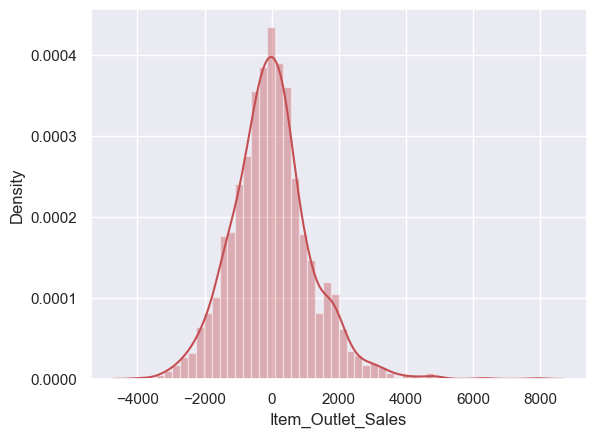

In [295]:
linearregression=predict(LinearRegression())
linearregression

Score:0.9373417117728419
predictions are:
[4489.92217  1807.027806 2239.338404 ...  961.062326 3288.612572
 2585.880646]


r2 score: 0.5712867813571973
MAE: 797.8458569184751
MSE: 1272597.3764150902
RMSE: 1128.0945777793147


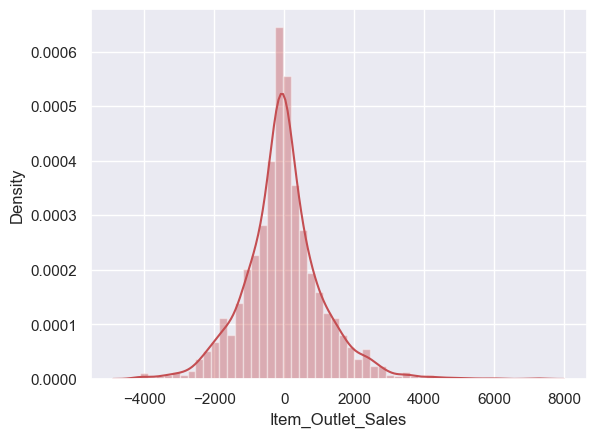

In [293]:
random_forest=predict(RandomForestRegressor())
random_forest

# Save the Model

In [300]:
filename = 'finalized_model.pickle'
pickle.dump(random_forest, open(filename, 'wb'))